2. Zipf's Law:
Zipf's Law states that the frequency of a word is inversely proportional to its rank. In the context of Twitter data

3. Heap's Law:
Heap's Law describes the relationship between the number of distinct words in a document and the document's size. In the context of Twitter data

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


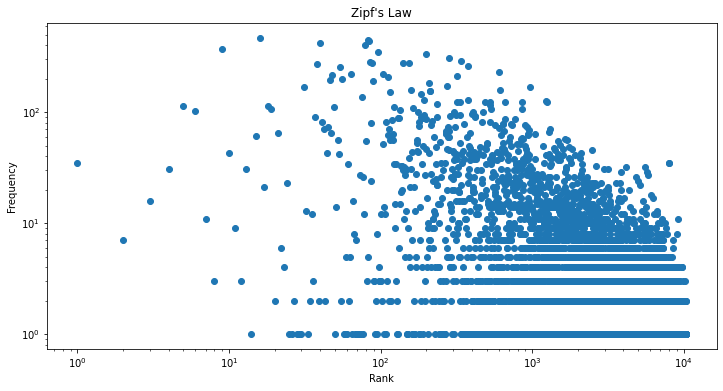

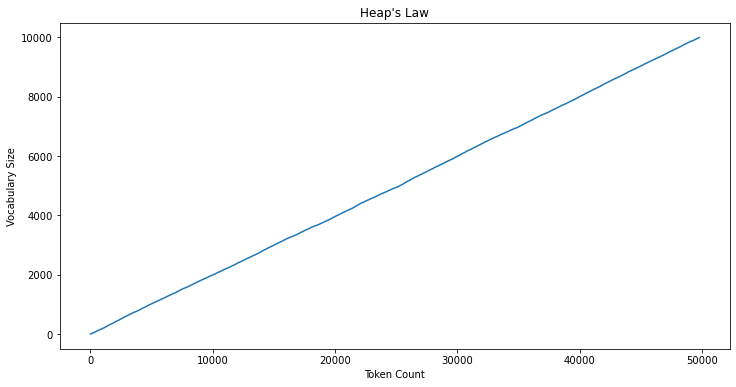

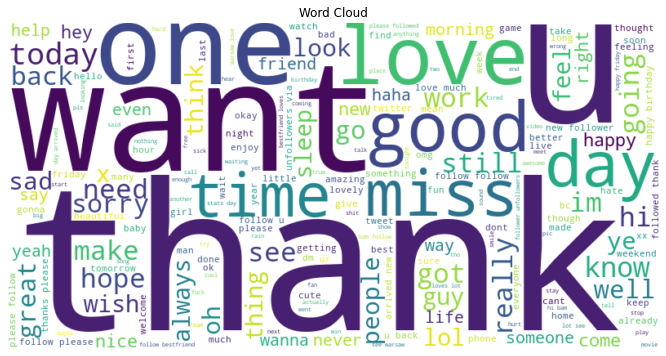

In [4]:
import nltk
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK Twitter sample dataset
nltk.download('twitter_samples')

# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Combine positive and negative tweets
all_tweets = positive_tweets + negative_tweets

# Pre-processing
def preprocess_text(text):
    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    return tokens

# Apply pre-processing to all tweets
processed_tweets = [preprocess_text(tweet) for tweet in all_tweets]

# Zipf's Law
# Zipf's Law
fdist = FreqDist(all_words)

# Plot Zipf's Law
plt.figure(figsize=(12, 6))
plt.loglog(range(1, len(fdist) + 1), list(fdist.values()), marker='o', linestyle='None')
plt.title("Zipf's Law")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

# Heap's Law
vocabulary_size = []
token_count = 0

for tweet in processed_tweets:
    token_count += len(tweet)
    vocabulary_size.append(token_count)

# Plot Heap's Law
plt.figure(figsize=(12, 6))
plt.plot(vocabulary_size, range(1, len(vocabulary_size) + 1))
plt.title("Heap's Law")
plt.xlabel('Token Count')
plt.ylabel('Vocabulary Size')
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=200, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Topic Modeling (Latent Dirichlet Allocation)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform([' '.join(tweet) for tweet in processed_tweets])

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display topics
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f'Topic #{topic_idx + 1}: {", ".join(top_keywords)}')
